# Восстановление золота из руды

Нам необходимо подготовить прототип модели машинного обучения для промышленного предприятия, которое занимается восстановлением золота из золотосодержащей руды.

Модель должна предсказывать коэффициент восстановления золота. Необходимо добиться минимального показателя sMAPE обученной модели.

**Данные:**

В нашем распоряжении имеются данные с параметрами добычи и очистки.

Данные находятся в трёх файлах:

- **gold_recovery_train.csv** — обучающая выборка;
- **gold_recovery_test.csv** — тестовая выборка;
- **gold_recovery_full.csv** — исходные данные.


Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи. Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

Данные в нашем распоряжении являются сырыми: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, требуется проверить их на корректность согласно согласованной с заказчиком инструкции.

**Признаки обозначены следующим образом:**

`[этап].[тип_параметра].[название_параметра]`

Пример: `rougher.input.feed_ag`

Возможные значения для блока `[этап]`:

- **rougher** — флотация
- **primary_cleaner** — первичная очистка
- **secondary_cleaner** — вторичная очистка
- **final** — финальные характеристики

Возможные значения для блока `[тип_параметра]`:

- **input** — параметры сырья
- **output** — параметры продукта
- **state** — параметры, характеризующие текущее состояние этапа
- **calculation** — расчётные характеристики

<h1>План работы<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откроем-исходные-файлы-и-сохраним-их-в-переменных" data-toc-modified-id="Откроем-исходные-файлы-и-сохраним-их-в-переменных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем исходные файлы и сохраним их в переменных</a></span></li><li><span><a href="#Проверим-корректность-расчетов-эффективности-обогащения" data-toc-modified-id="Проверим-корректность-расчетов-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверим корректность расчетов эффективности обогащения</a></span></li><li><span><a href="#Проанализируем-признаки,-недоступные-в-тестовой-выборке." data-toc-modified-id="Проанализируем-признаки,-недоступные-в-тестовой-выборке.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проанализируем признаки, недоступные в тестовой выборке.</a></span></li><li><span><a href="#Проведем-предобработку-данных." data-toc-modified-id="Проведем-предобработку-данных.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проведем предобработку данных.</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-на-различных-этапах-очистки." data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-на-различных-этапах-очистки.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов на различных этапах очистки.</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Напишем-функцию-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функцию для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучение-моделей-и-оценка-их-качества" data-toc-modified-id="Обучение-моделей-и-оценка-их-качества-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей и оценка их качества</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>RandomForest</a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Подготовка данных

**Первым делом импортируем необходимые библиотеки**

In [1]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
pip install missingno -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
import missingno
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

### Откроем исходные файлы и сохраним их в переменных

In [6]:
# если можно, открываем файл из локального носителя
# или с Jupyter Hub
try:
    df_train = pd.read_csv('gold_recovery_train_new.csv')
    df_test = pd.read_csv('gold_recovery_test_new.csv')
    df_full = pd.read_csv('gold_recovery_full_new.csv')
except:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv') 

Оценим, что из себя представляют тренировочные данные.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


### Проверим корректность расчетов эффективности обогащения

Вычислим её на обучающей выборке для признака `rougher.output.recovery`. Найдем MAE между нашими расчётами и значением признака.

In [8]:
# Сохраним переменные согласно нашей формуле
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

In [9]:
# Заведем столбец с новыми (посчитанными вручную) значениями
df_train['new_rougher_rec'] = (C*(F-T))/(F*(C-T))*100

In [10]:
# Посчитаем MAE для двух столбцов
mean_absolute_error(df_train['rougher.output.recovery'], df_train['new_rougher_rec'])

9.83758577644259e-15

**Наблюдаем очень маленькое число, стремящееся к нулю.**

Для нас это означает, что эффективность расчетов в исходных данных посчитана верно, согласно формуле.

### Проанализируем признаки, недоступные в тестовой выборке.

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

**Сразу бросается в глаза меньшее число колонок.**

Что вполне логично: ряд признаков нам недоступен (характеристики calculation и output), пока не начался процесс обогащения. Их невозможно получить или замерить во время выполнения технологического процесса.

### Проведем предобработку данных.

Предобработку будем проводить в следующем порядке:

- разделим данные на тренировочные и целевые признаки;


- оценим пропуски в данных;


- стандартизируем наши данные;


- заполним пропуски с помощью KNNImputer;


- оценим мультиколлинеарность, уберем мультиколлинеарные признаки путем объединения.

**Разделим данные на таргет и фичи**

In [12]:
features_train = df_train.reset_index(drop=True)
target_train_for_rougher = df_train['rougher.output.recovery'].reset_index(drop=True)
target_train_for_final = df_train['final.output.recovery'].reset_index(drop=True)

По итогу мы будем строить две модели. Первая будет определять коэффициент восстановления золота для чернового сырья, вторая - для финального концентрата. 

Именно поэтому таргета два.

In [13]:
# Приведем колонку с датой к правильному формату
features_train['date'] = pd.to_datetime(features_train['date'])

В перспективе колонку с датой мы удалим, но на данный момент приведем ее к надлежащему типу данных. Она нам еще пригодится для выделения тестовых таргетов, так как индексы в данных разные, нам придется выдергивать их из полного датафрейма по дате.

Естественно, в самом обучении нам эта колонка будет не нужна, поэтому мы ее дропнем. Но чуть позже.

**Оценим пропуски в наших данных**

Для этого воспользуемся библиотекой missingno.

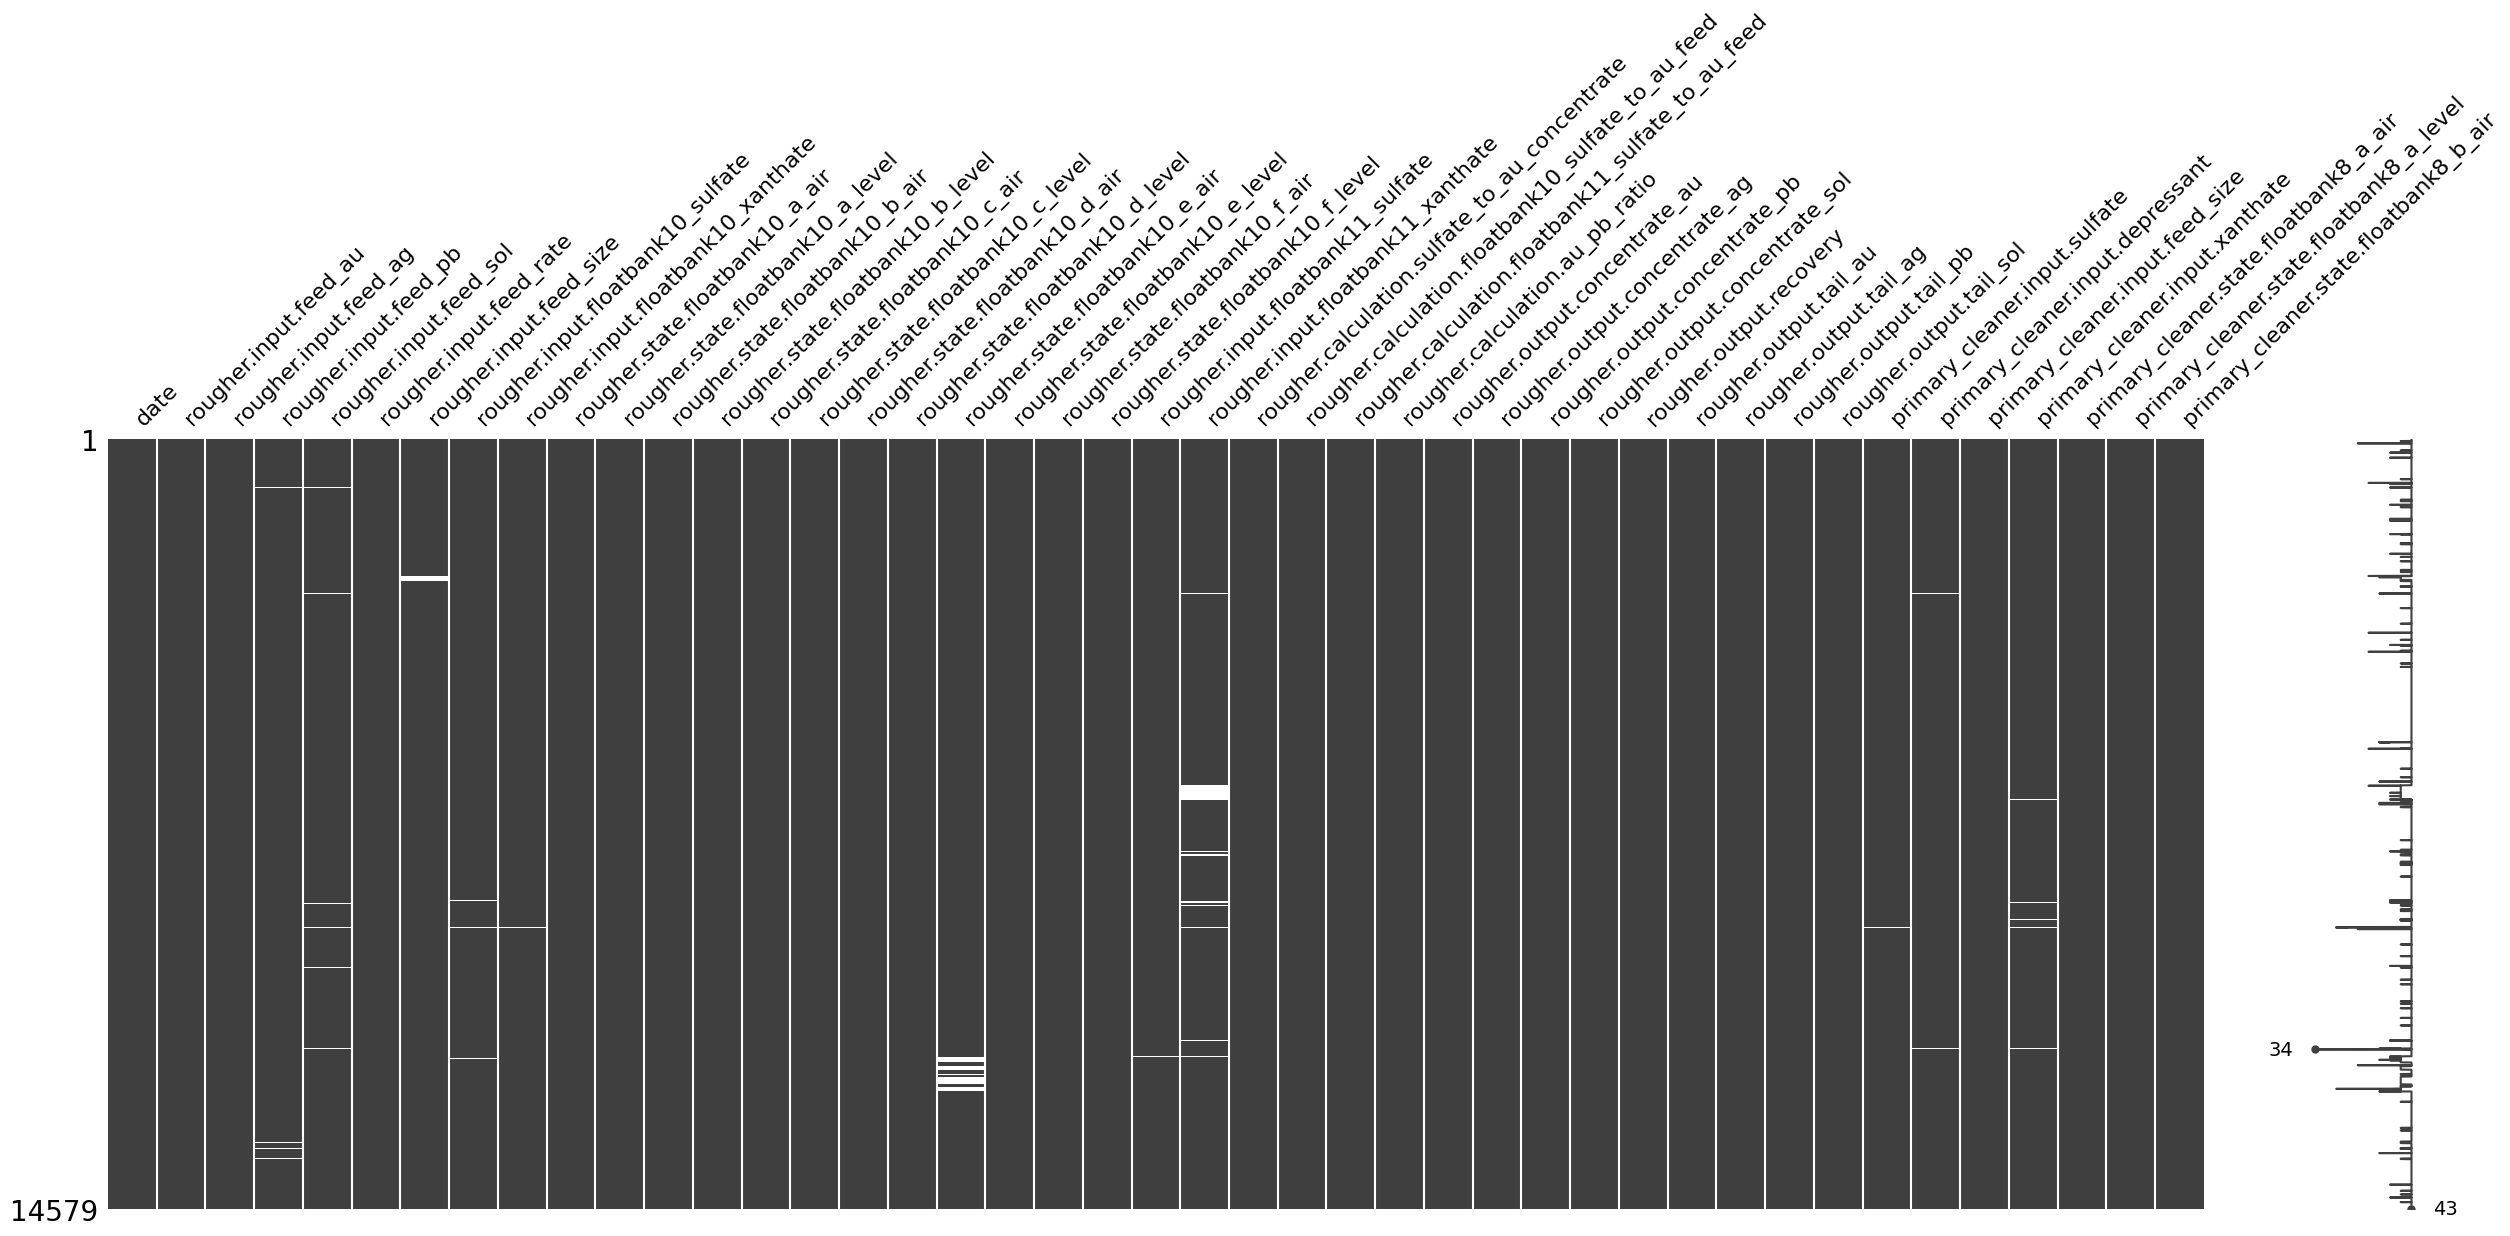

In [15]:
missingno.matrix(features_train[features_train.columns[:43]], figsize = (30,10));

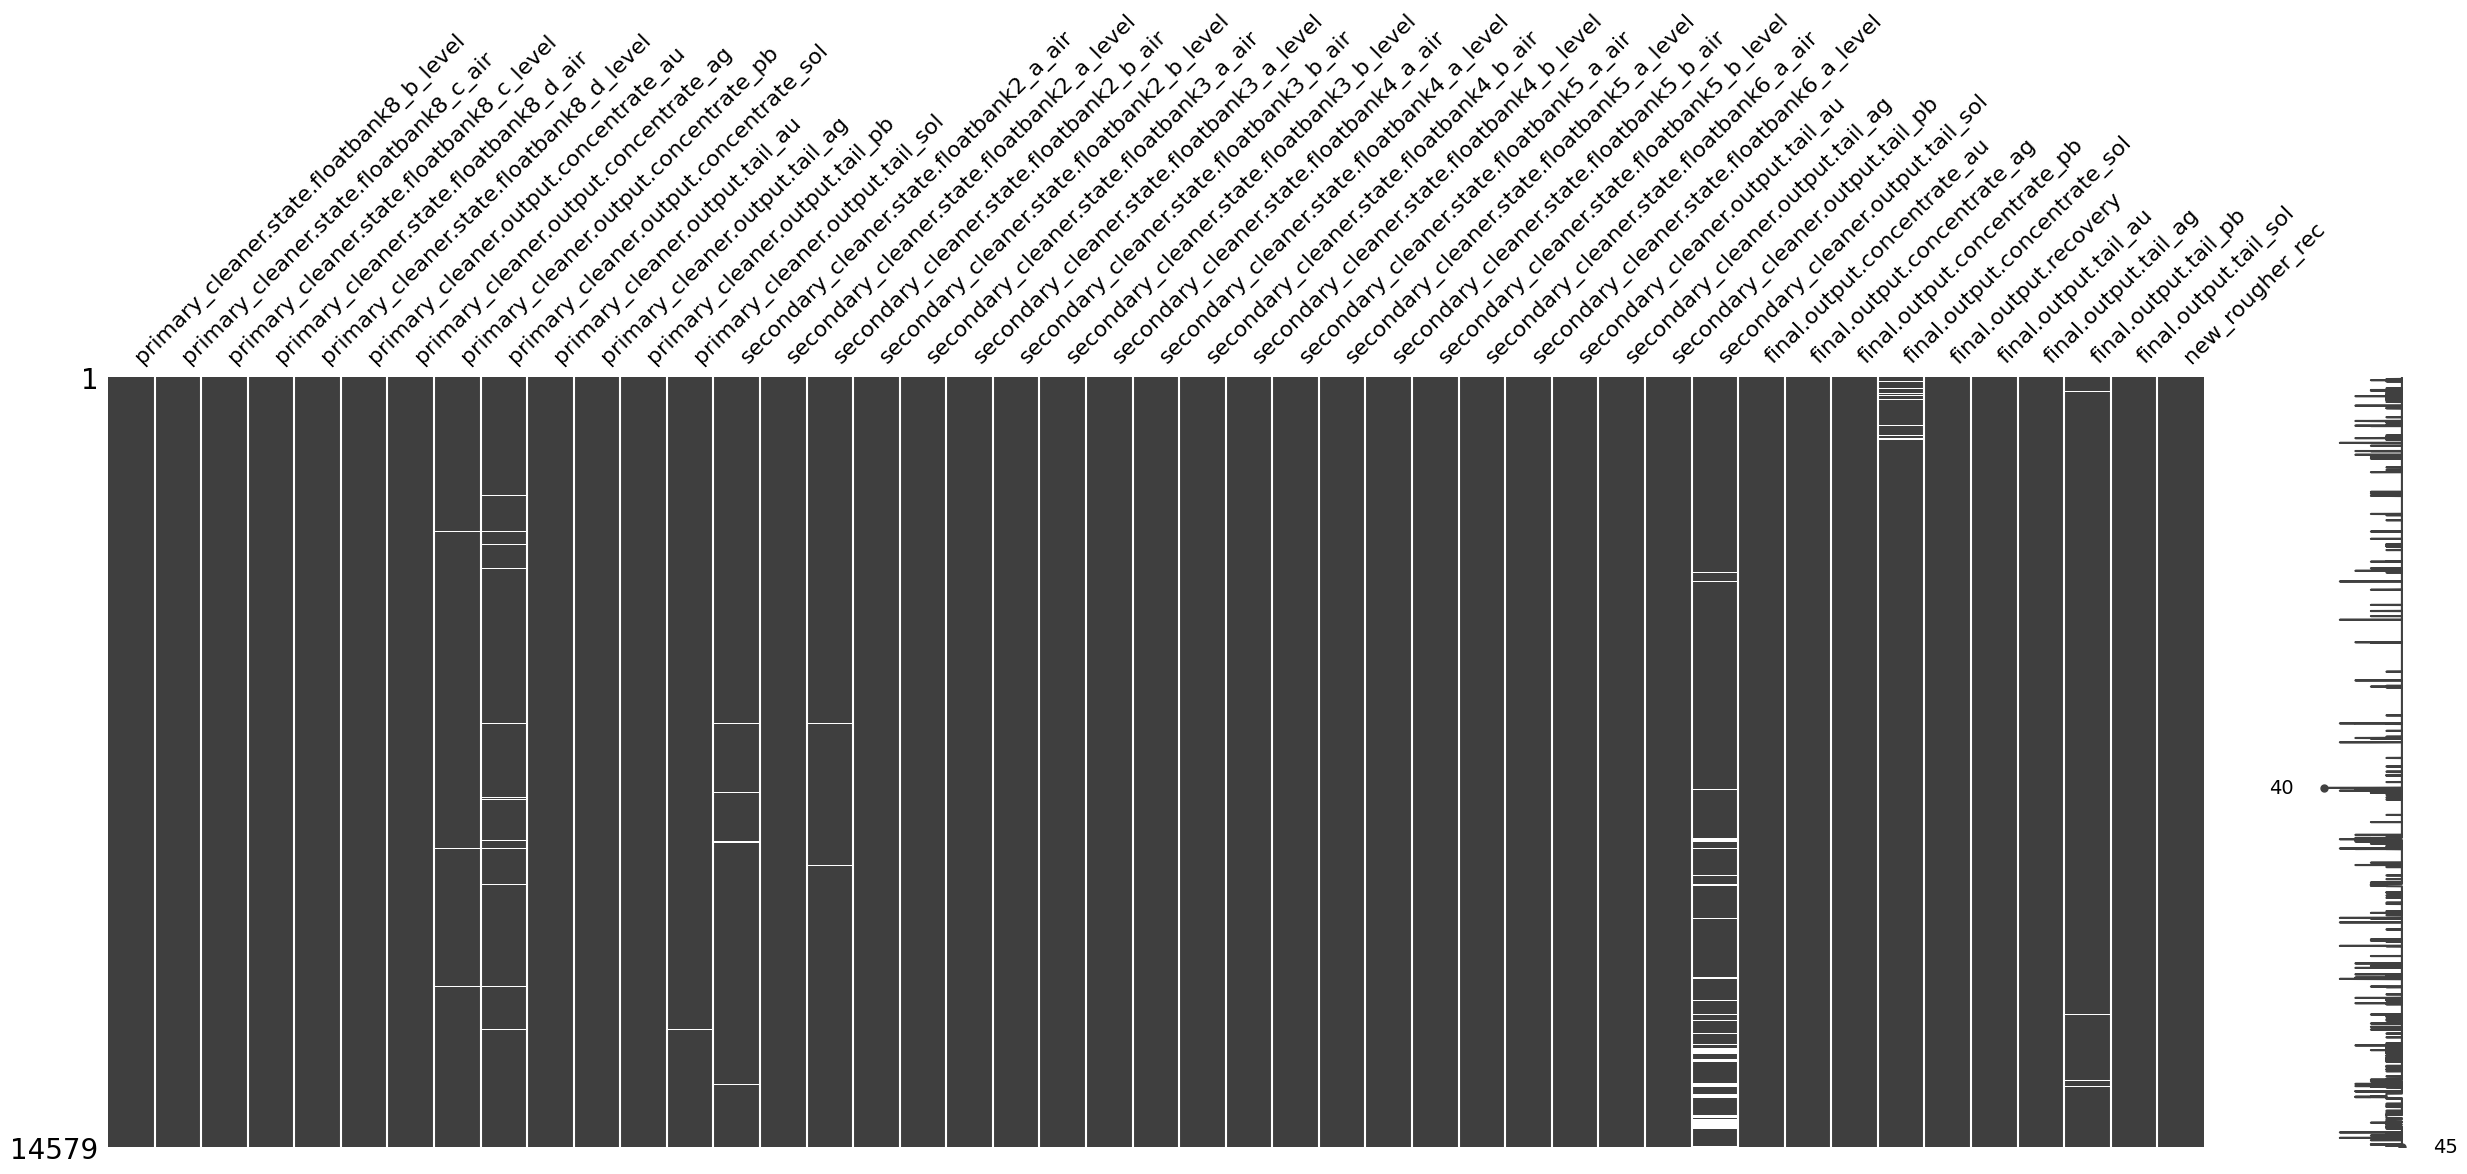

In [16]:
missingno.matrix(features_train[features_train.columns[43:]], figsize = (30,10));

Хотя и в условиях задачи сказано, что соседние по времени параметры часто похожи, на полученной матрице мы можем увидеть пропуски, которые растягиваются на несколько строк. Если бы этого не было, то мы бы заполнили пропуски предыдущими значениями. 

Так как есть подряд большие пропуски, я буду использовать KNNImputer. Но перед эти необходимо стандартизировать данные.

In [17]:
# В отдельную переменную сохраним трейн до стандартизации и заполнения пропусков (это для решения второго вопроса)
features_train_for_analitic = features_train.fillna(method='ffill')

**Стандартизация**

In [18]:
features_train = features_train[df_test.columns]

In [19]:
numeric = list(features_train.columns[1:])

#стандартизируем тренировочную выборку
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])

**Заполнение с помощью  KNNImputer**

In [20]:
# сделаем копию исходной таблицы только с количественными переменными, чтобы применить на ней импутер
df_for_knn = features_train[features_train.columns[1:]]

In [21]:
# применяем импутер и перезаписываем в ту же таблицу
imputer = KNNImputer(n_neighbors=3)
df_for_knn = pd.DataFrame(imputer.fit_transform(df_for_knn), columns=df_for_knn.columns)

In [22]:
# перезаписываем столбец в исходной таблице, чтобы избавиться от пропусков в исходнике
features_train[features_train.columns[1:]] = df_for_knn[features_train.columns[1:]]

In [23]:
# Проверка
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        14579 non-null  datetime64[ns]
 1   rougher.input.feed_au                       14579 non-null  float64       
 2   rougher.input.feed_ag                       14579 non-null  float64       
 3   rougher.input.feed_pb                       14579 non-null  float64       
 4   rougher.input.feed_sol                      14579 non-null  float64       
 5   rougher.input.feed_rate                     14579 non-null  float64       
 6   rougher.input.feed_size                     14579 non-null  float64       
 7   rougher.input.floatbank10_sulfate           14579 non-null  float64       
 8   rougher.input.floatbank10_xanthate          14579 non-null  float64       
 9   roughe

<a id='section0.1'></a>

In [24]:
features_train_for_analitic['Флотация'] = (features_train_for_analitic['rougher.output.concentrate_ag'] + 
                                      features_train_for_analitic['rougher.output.concentrate_pb'] + 
                                      features_train_for_analitic['rougher.output.concentrate_au']) / (features_train_for_analitic['rougher.output.concentrate_ag'] + 
                                                                                   features_train_for_analitic['rougher.output.concentrate_pb'] + 
                                                                                   features_train_for_analitic['rougher.output.concentrate_au'] + 
                                                                                  features_train_for_analitic['rougher.output.concentrate_sol']) * 100

features_train_for_analitic['Первый этап очистки'] = (features_train_for_analitic['primary_cleaner.output.concentrate_ag'] + 
                                      features_train_for_analitic['primary_cleaner.output.concentrate_pb'] + 
                                      features_train_for_analitic['primary_cleaner.output.concentrate_au']) / (features_train_for_analitic['primary_cleaner.output.concentrate_ag'] + 
                                                                                           features_train_for_analitic['primary_cleaner.output.concentrate_pb'] + 
                                                                                           features_train_for_analitic['primary_cleaner.output.concentrate_au'] +
                                                                                          features_train_for_analitic['primary_cleaner.output.concentrate_sol']) * 100

features_train_for_analitic['Второй этап очистки'] = (features_train_for_analitic['final.output.concentrate_ag'] + 
                                    features_train_for_analitic['final.output.concentrate_pb'] + 
                                    features_train_for_analitic['final.output.concentrate_au']) / (features_train_for_analitic['final.output.concentrate_ag'] + 
                                                                               features_train_for_analitic['final.output.concentrate_pb'] + 
                                                                               features_train_for_analitic['final.output.concentrate_au'] +
                                                                              features_train_for_analitic['final.output.concentrate_sol']) * 100

df_concentrate = features_train_for_analitic[['Флотация','Первый этап очистки','Второй этап очистки']]

In [25]:
df_concentrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Флотация             14185 non-null  float64
 1   Первый этап очистки  14471 non-null  float64
 2   Второй этап очистки  14481 non-null  float64
dtypes: float64(3)
memory usage: 341.8 KB


In [27]:
for col in ['Флотация','Первый этап очистки','Второй этап очистки']:
    df_concentrate = df_concentrate.loc[(df_concentrate[col]<=100)&(df_concentrate[col]>=0), :]


In [28]:
df_concentrate

,Флотация,Первый этап очистки,Второй этап очистки
0,57.803059,73.115297,91.346726
1,58.116806,73.299950,91.779286
2,58.468288,73.413458,91.628580
3,58.418047,73.350325,92.357448
4,58.971800,73.079653,92.282726
...,...,...,...
14574,57.718995,87.180433,89.717551
14575,57.771543,87.495211,89.884735
14576,57.518631,88.040449,90.009364
14577,57.776950,87.367220,89.949011


**Оцениваем мультиколлинеарность**

Мультиколлинеарность будем оценивать с помощью VIF. За порог возьмем значение более 5: т.е. если VIF признака больше 5, мы преобразуем его в новый признак.

In [29]:
X = features_train[list(features_train.columns[1:])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
13,86.804708,rougher.state.floatbank10_c_level
11,54.651623,rougher.state.floatbank10_b_level
17,39.812152,rougher.state.floatbank10_e_level
19,33.841940,rougher.state.floatbank10_f_level
15,30.744366,rougher.state.floatbank10_d_level
28,20.964760,primary_cleaner.state.floatbank8_b_air
14,17.278012,rougher.state.floatbank10_d_air
26,17.045284,primary_cleaner.state.floatbank8_a_air
10,15.021288,rougher.state.floatbank10_b_air
16,14.846632,rougher.state.floatbank10_e_air


Колонки, где VIF больше 5, преобразуем в новые признаки, путем деления значений.

`P.S. Мною были испробованы способы удаления этих признаков совсем, но сохранение этих переменных в новом виде дало лучший результат.`

Для этого напишем маленькую функцию:

In [30]:
def del_mcoll(features_train):
    
    '''Функция преобразует мультиколлинеарные столбцы в новые'''


    features_train['rougher.state.floatbank10_diff'] = (features_train['rougher.state.floatbank10_c_level'] / 
                                                   features_train['rougher.state.floatbank10_e_level'] / 
                                                   features_train['rougher.state.floatbank10_b_level'] / 
                                                   features_train['rougher.state.floatbank10_f_level'] / 
                                                   features_train['rougher.state.floatbank10_d_level'] / 
                                                   features_train['rougher.state.floatbank10_d_air'] / 
                                                   features_train['rougher.state.floatbank10_b_air'] / 
                                                   features_train['rougher.state.floatbank10_e_air'] / 
                                                   features_train['rougher.state.floatbank10_f_air'] / 
                                                   features_train['rougher.state.floatbank10_c_air'])
    features_train['primary_cleaner.state.floatbank8_diff'] = (features_train['primary_cleaner.state.floatbank8_a_level'] / 
                                                   features_train['primary_cleaner.state.floatbank8_b_air'] / 
                                                   features_train['primary_cleaner.state.floatbank8_b_level'] / 
                                                   features_train['primary_cleaner.state.floatbank8_c_level'] / 
                                                   features_train['primary_cleaner.state.floatbank8_a_air'] / 
                                                   features_train['primary_cleaner.state.floatbank8_c_air'])
    features_train['secondary_cleaner.state.floatbank_diff'] = (features_train['secondary_cleaner.state.floatbank4_b_air'] / 
                                                   features_train['secondary_cleaner.state.floatbank2_b_air'] / 
                                                   features_train['secondary_cleaner.state.floatbank5_b_air'] / 
                                                   features_train['secondary_cleaner.state.floatbank2_a_air'] / 
                                                   features_train['secondary_cleaner.state.floatbank4_a_air'] / 
                                                   features_train['secondary_cleaner.state.floatbank4_a_level'] / 
                                                   features_train['secondary_cleaner.state.floatbank5_a_level'] / 
                                                   features_train['secondary_cleaner.state.floatbank5_a_air'] / 
                                                   features_train['secondary_cleaner.state.floatbank2_b_level'] / 
                                                   features_train['secondary_cleaner.state.floatbank2_a_level'] /
                                                            features_train['secondary_cleaner.state.floatbank4_b_level'])
    features_train['rougher.input.floatbank_diff'] = (features_train['rougher.input.floatbank10_xanthate'] / 
                                                   features_train['rougher.input.floatbank11_xanthate'] / 
                                                   features_train['rougher.input.floatbank10_sulfate'] / 
                                                   features_train['rougher.input.floatbank11_sulfate'] /
                                                 features_train['rougher.input.feed_au'])


    features_train = features_train.drop(['rougher.state.floatbank10_c_level','rougher.state.floatbank10_e_level','rougher.state.floatbank10_b_level',
             'rougher.state.floatbank10_f_level','rougher.state.floatbank10_d_level','rougher.state.floatbank10_d_air',
             'rougher.state.floatbank10_b_air','rougher.state.floatbank10_e_air','rougher.state.floatbank10_f_air',
             'rougher.state.floatbank10_c_air','primary_cleaner.state.floatbank8_a_level','primary_cleaner.state.floatbank8_b_air',
                                      'primary_cleaner.state.floatbank8_b_level','primary_cleaner.state.floatbank8_c_level',
                                      'primary_cleaner.state.floatbank8_a_air','primary_cleaner.state.floatbank8_c_air',
                                     'secondary_cleaner.state.floatbank4_b_air','secondary_cleaner.state.floatbank2_b_air',
                                      'secondary_cleaner.state.floatbank5_b_air','secondary_cleaner.state.floatbank2_a_air',
                                      'secondary_cleaner.state.floatbank4_a_air','secondary_cleaner.state.floatbank4_a_level',
                                      'secondary_cleaner.state.floatbank5_a_level','secondary_cleaner.state.floatbank5_a_air',
                                      'secondary_cleaner.state.floatbank2_b_level','secondary_cleaner.state.floatbank2_a_level',
                                      'secondary_cleaner.state.floatbank4_b_level','rougher.input.floatbank10_xanthate',
                                      'rougher.input.floatbank11_xanthate','rougher.input.floatbank10_sulfate','rougher.input.floatbank11_sulfate',
                                         'rougher.input.feed_au'], axis=1)
    return features_train


Функция нам пригодится в дальнейшем, так как нам необходимо будет провести эту манипуляцию с тестовыми данными.

In [31]:
features_train = del_mcoll(features_train)

Посмотрим, что стало с мультиколлинеарностью теперь:

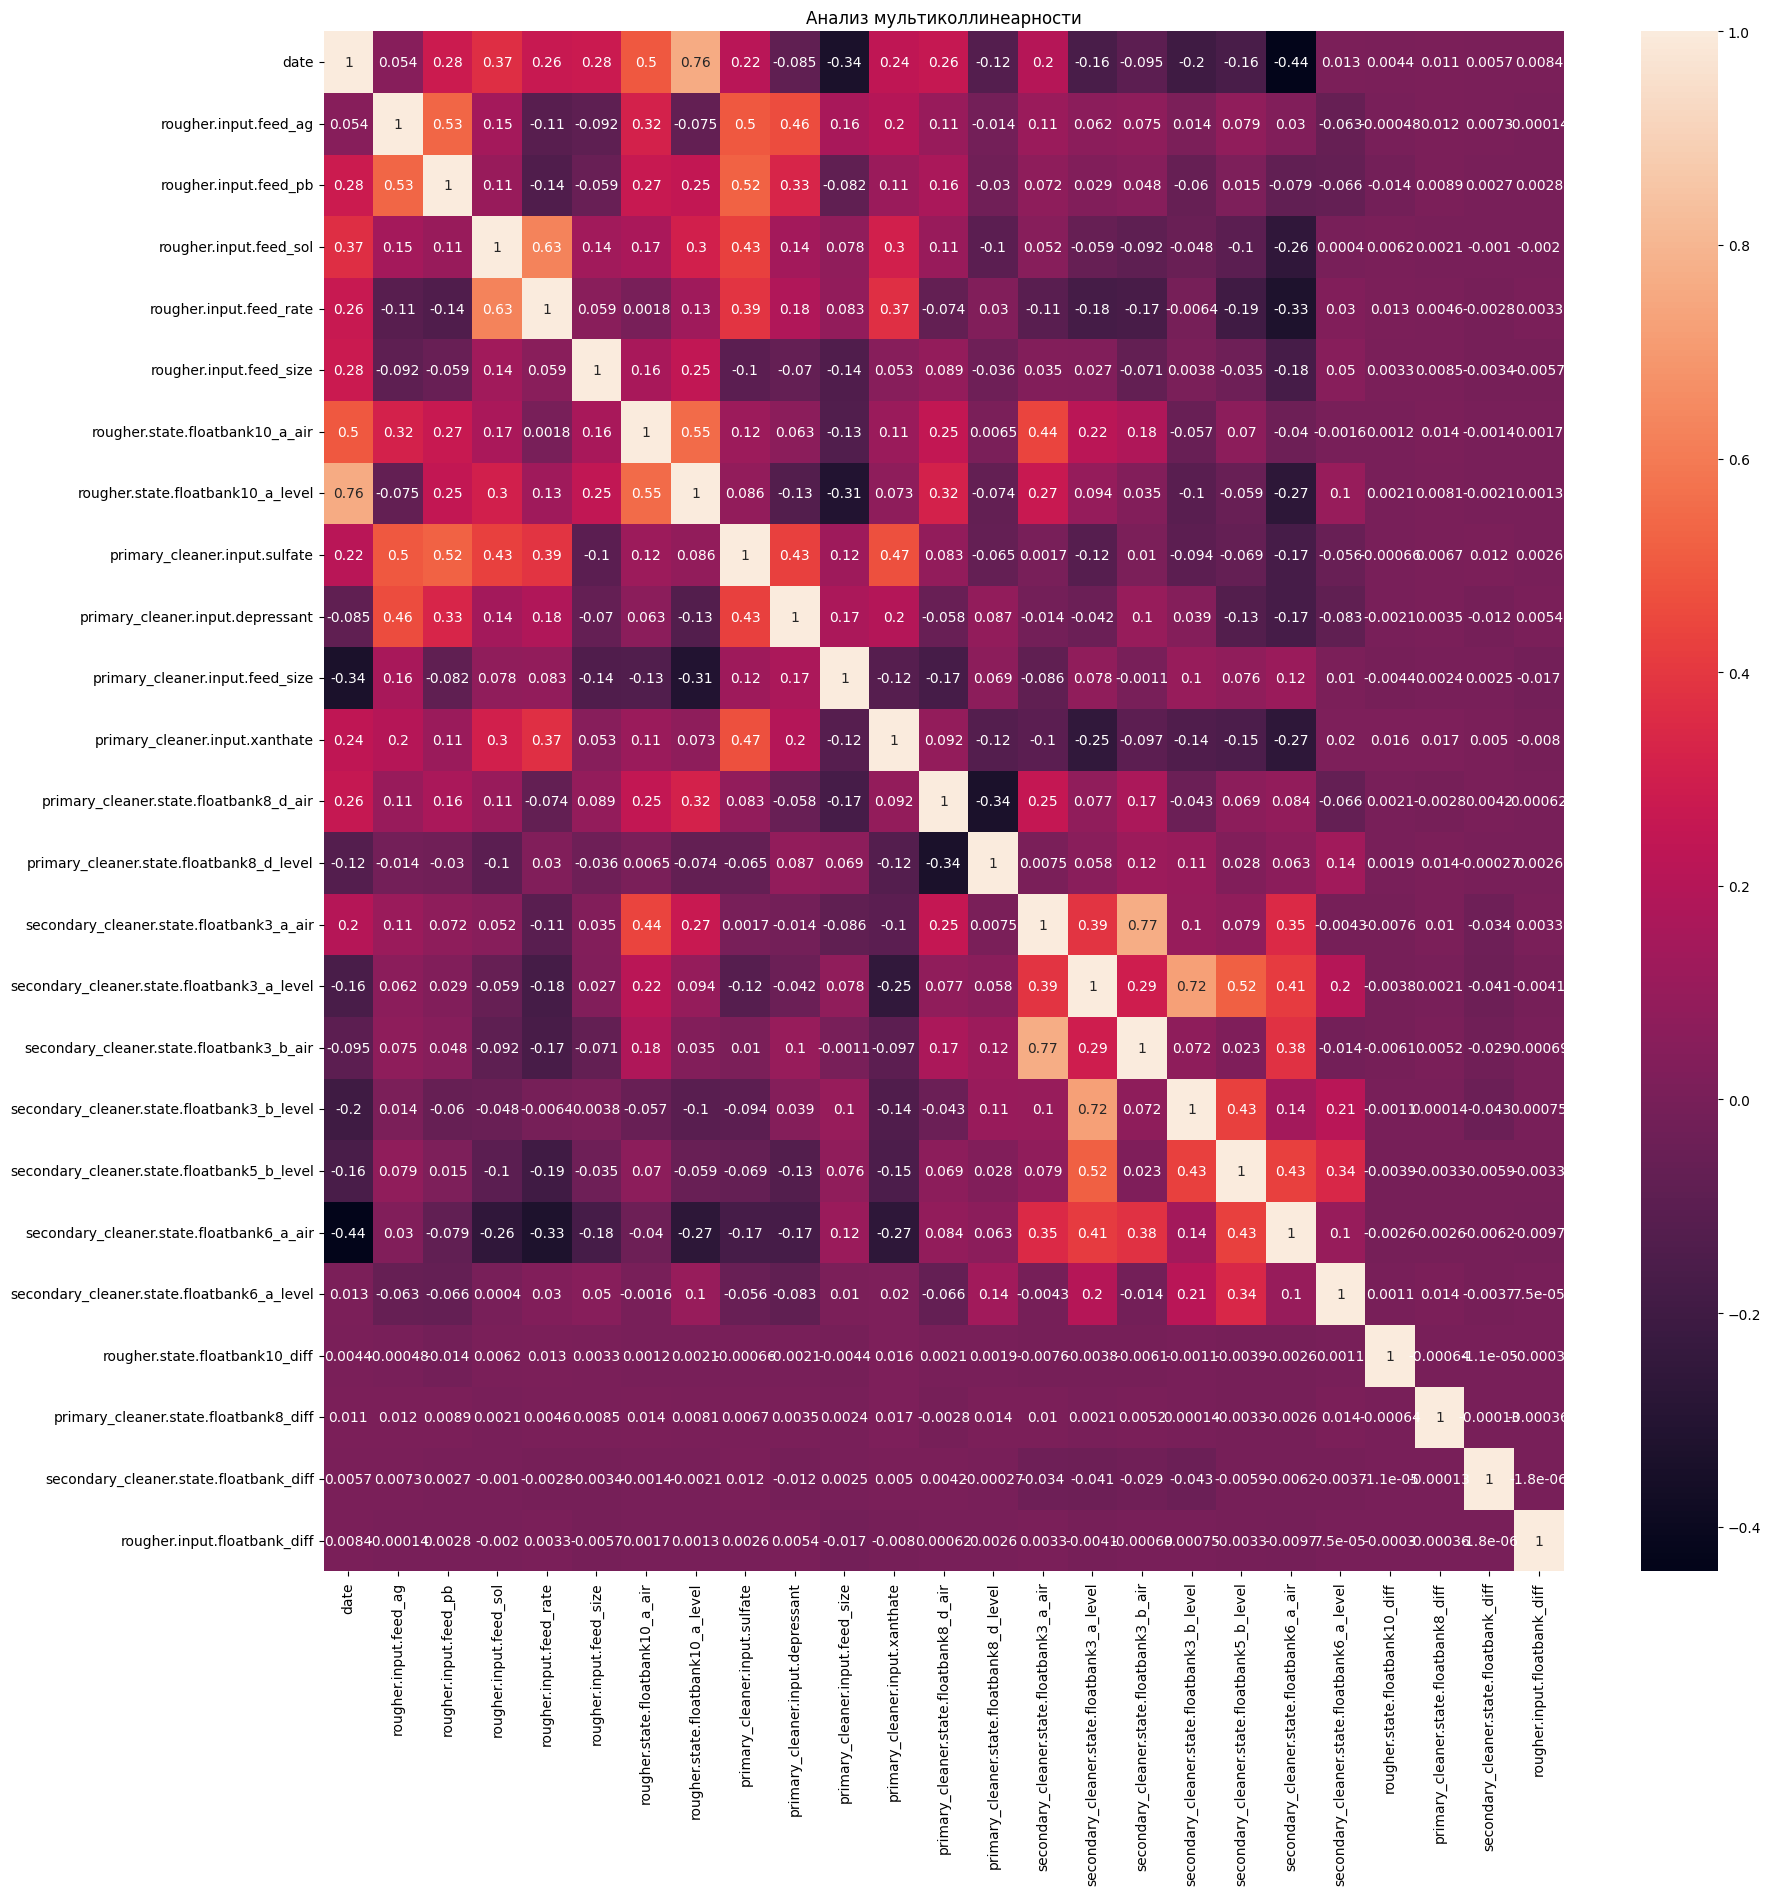

In [34]:
# Оценим, как коррелируют признаки в нашей таблице между собой
plt.figure(figsize=(20, 20))
plt.title('Анализ мультиколлинеарности')
sns.heatmap(features_train.corr(), annot=True);

Как можем заметить, ни одного значения выше 0.8 (или ниже 0.8) не наблюдается.

Тренировочные данные готовы для загрузки в модель.

**Промежуточный вывод:**

На первом этапе нашей работы мы загрузили все необходимые для работы библиотеки. Открыли предоставленные данные и записали их в переменные. По заданию проверили корректность расчетов эффективности. Оценили, что количество признаков в исходной обучающей выборке и в тестовой выборке отличается.

После провели предобработку данных, стандартизировав данные, заполнив пропуски и устранив мультиколлинеарность.

На следующем этапе построим несколько графиков и ответим на поставленные вопросы.

## Анализ данных

### Посмотрим, как меняется концентрация металлов на различных этапах очистки. 

Для ответа на вопросы этого этапа мы будем использовать полную исходную выборку.

Напишем функцию, которая будет строить распределение для каждого металла:

In [39]:
def concentrate(feed,rougher,primary,output, metall, max):
    
    '''Функция рассчитывает концентрацию различных металлов на разных этапах очистки,
    результат отображается на гистограмме'''


    df_full['Флотация'] = rougher / (df_full['rougher.output.concentrate_ag'] + 
                                                                                   df_full['rougher.output.concentrate_pb'] + 
                                                                                   df_full['rougher.output.concentrate_au'] + 
                                                                                  df_full['rougher.output.concentrate_sol']) * 100
    df_full['Первичная очистка'] = primary / (df_full['primary_cleaner.output.concentrate_ag'] + 
                                                                                           df_full['primary_cleaner.output.concentrate_pb'] + 
                                                                                           df_full['primary_cleaner.output.concentrate_au'] +
                                                                                          df_full['primary_cleaner.output.concentrate_sol']) * 100
    df_full['Вторичная очистка'] = output / (df_full['final.output.concentrate_ag'] + 
                                                                               df_full['final.output.concentrate_pb'] + 
                                                                               df_full['final.output.concentrate_au'] +
                                                                              df_full['final.output.concentrate_sol']) * 100
    df_full['Исходное сырьё'] = feed / (df_full['rougher.input.feed_ag'] + 
                                                                               df_full['rougher.input.feed_pb'] + 
                                                                               df_full['rougher.input.feed_au'] +
                                                                              df_full['rougher.input.feed_sol']) * 100
    df_concentrate = df_full[['Исходное сырьё','Флотация','Первичная очистка','Вторичная очистка']]
    
    sns.set(style="darkgrid")
    plt.figure(figsize=(10, 10))
    plt.xlim(0, max) 
    ax = sns.histplot(df_concentrate, alpha=0.7, bins=80, shrink=.8)
    ax.set_title(f'Концентрация {metall} на разных этапах очистки')
    ax.set_ylabel('Количество объектов')
    ax.set_xlabel('Концентрация металла в процентах')
    return ax

Далее применим ее к каждому металлу в наших данных:

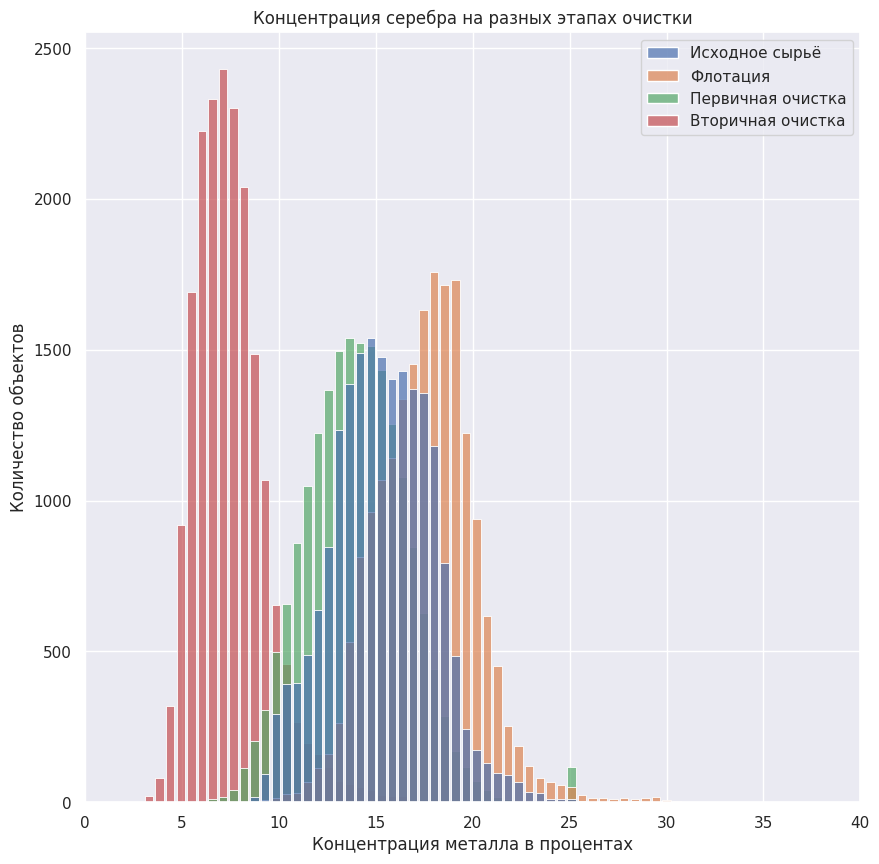

In [41]:
concentrate(df_full['rougher.input.feed_ag'],
            df_full['rougher.output.concentrate_ag'], 
            df_full['primary_cleaner.output.concentrate_ag'], 
            df_full['final.output.concentrate_ag'], 'серебра', 40);

**Комментарий:**

Концентрация серебра после каждого этапа очистки уменьшается. Что для нас хорошо, так как нам необходимо повышать концентрацию золота. Мы тут золотом вообще то занимаемся.

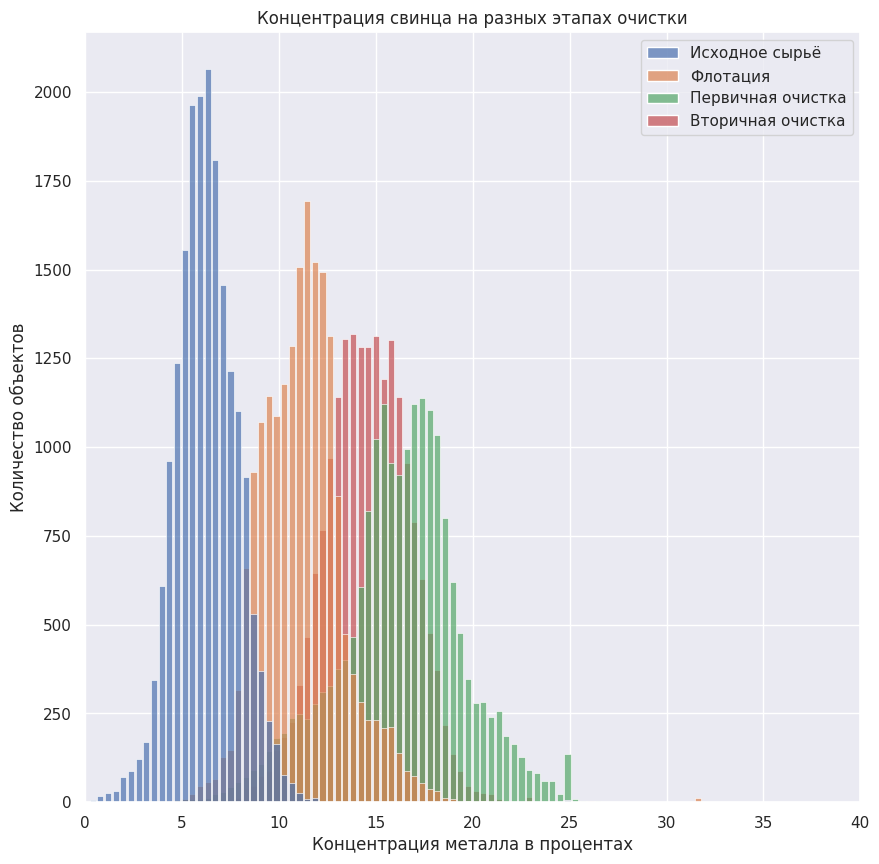

In [43]:
concentrate(df_full['rougher.input.feed_pb'],
            df_full['rougher.output.concentrate_pb'], 
            df_full['primary_cleaner.output.concentrate_pb'], 
            df_full['final.output.concentrate_pb'], 'свинца', 40);

**Комментарий:**

Концентрации свинца после первичной очистки стало больше, но вторичная очистка немного исправила ситуацию. Однако концентрация все равно больше, чем после флотации. Скорее всего это объясняется технологией процесса и тем, что других примесей и металлов стало намного меньше.

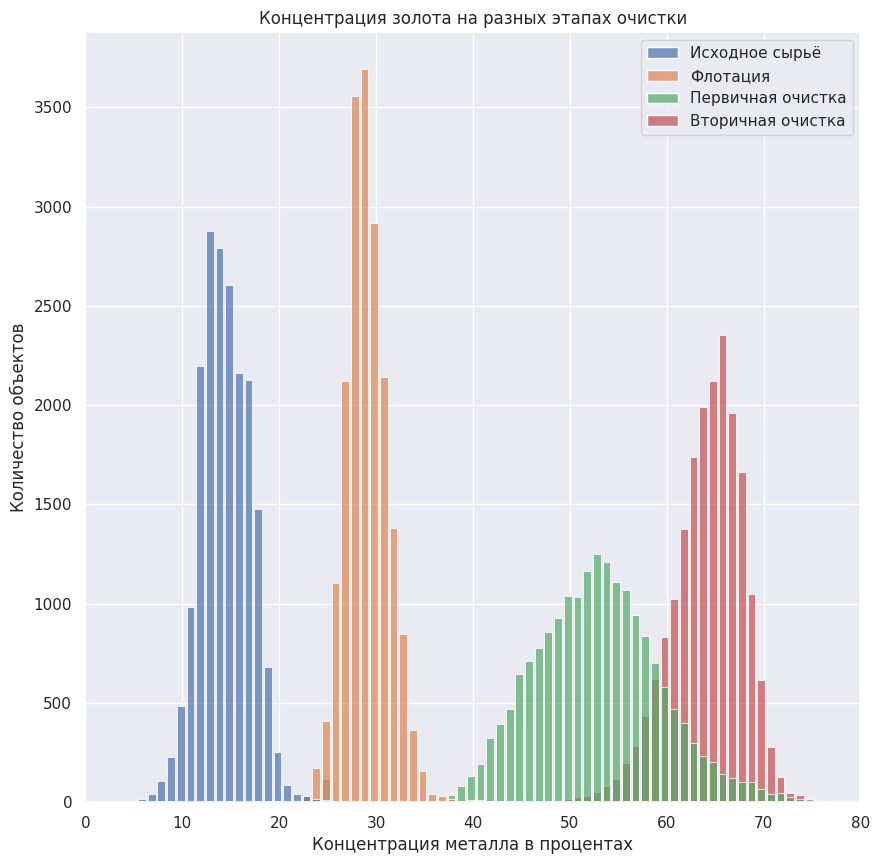

In [45]:
concentrate(df_full['rougher.input.feed_au'],
            df_full['rougher.output.concentrate_au'], 
            df_full['primary_cleaner.output.concentrate_au'], 
            df_full['final.output.concentrate_au'], 'золота', 80);

**Комментарий:**

А вот концентрация золота заметно растет после каждого этапа обработки. Что говорит о правильности наших действий в очистке.

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. 

Будет совсем нехорошо, если гранулы сырья для обучающей выборки одного размера, а для тестовой - это совсем другой показатель.

Убедимся, что данные в порядке. Для этого посмотрим на распределение.

In [46]:
# Соберем интересующие нас данные в одну табличку
size_df = pd.DataFrame()
size_df['test_size'] =  df_test['rougher.input.feed_size']
size_df['train_size'] = df_train['rougher.input.feed_size']

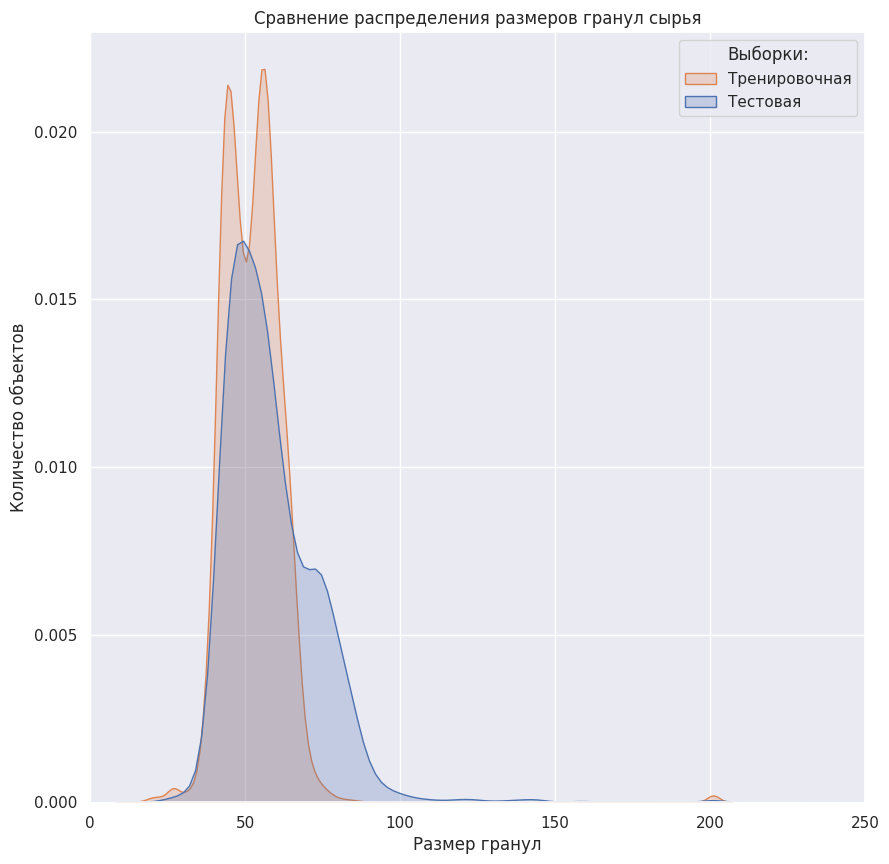

In [48]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
plt.xlim(0, 250) 
ax = sns.kdeplot(data=size_df.iloc[:,:], shade=True)
ax.set_title('Сравнение распределения размеров гранул сырья')
ax.set_ylabel('Количество объектов')
ax.set_xlabel('Размер гранул')
ax.legend(title='Выборки:', loc='upper right', labels=['Тренировочная','Тестовая']);

Как видно на графике, распределения размера гранул в обеих выборках схожий.
Следовательно, нет припятствий для обучения моделей.

### Исследуем суммарную концентрацию всех веществ на разных стадиях

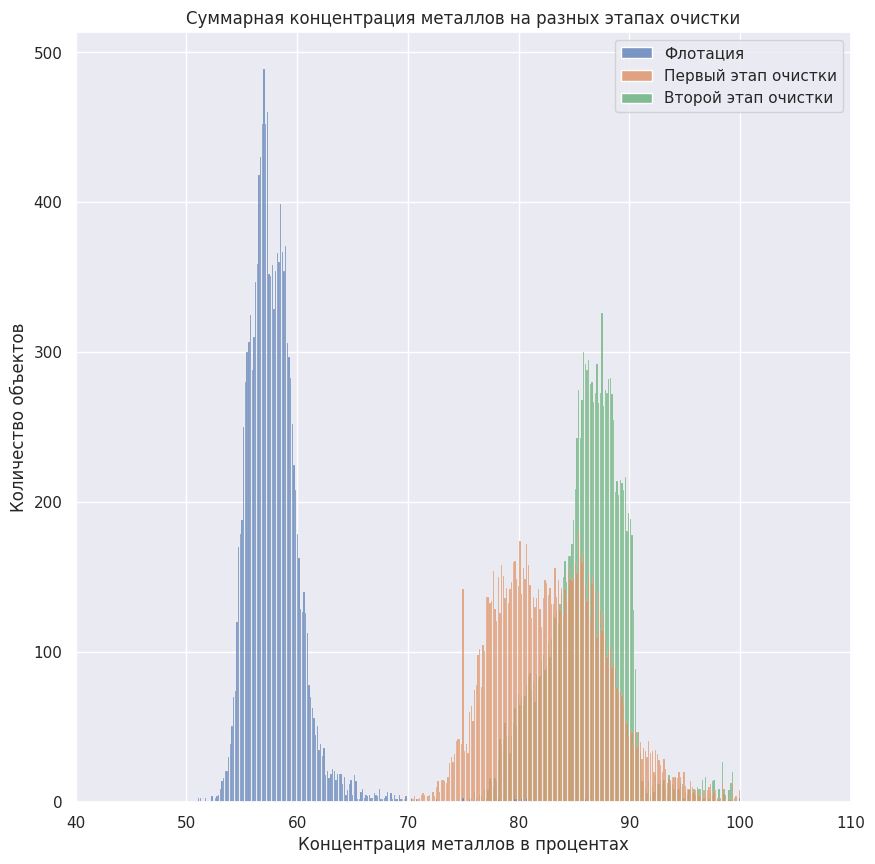

In [50]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
plt.xlim(40, 110) 
ax = sns.histplot(df_concentrate[['Флотация','Первый этап очистки','Второй этап очистки']], alpha=0.7, bins=400, shrink=.8)
ax.set_title('Суммарная концентрация металлов на разных этапах очистки')
ax.set_ylabel('Количество объектов')
ax.set_xlabel('Концентрация металлов в процентах');


**Комментарий:**

Как видно на графике, общая концентрация металлов на каждом этапе увеличивается. Что говорит о правильности действий: происходит избавление от лишних примесей.

**Промежуточный вывод:**

На данном этапе мы оценили, какие изменения в концентрации металлов происходят на стадиях обработки сырья, а также оценили отличаются ли гранулы сырья в тестовой и обучающей выборках.

На следующем этапе построим несколько моделей, выберем лучшие, оценим показатели на тестовой выборке.

## Модель

### Напишем функцию для вычисления итоговой sMAPE.

Данной функции нет в представленных библиотеках. Поэтому мы ее напишем вручную, добавим в модели с помощью make_scorer.


![jpg](https://pictures.s3.yandex.net/resources/smape_1576239058.jpg)

In [51]:
def my_custom_loss_func(ground_truth, predictions):
    diff = np.abs(ground_truth - predictions) / ((np.abs(ground_truth) + np.abs(predictions))/2)
    return diff.mean()*100

In [52]:
def total_smape(x,y):
    return (x * 0.25 + y * 0.75)

In [53]:
loss  = make_scorer(my_custom_loss_func, greater_is_better=False)

### Обучение моделей и оценка их качества 

Прежде чем обучать, стандартизируем тестовую выборку, выделим все необходимые переменные.

In [ ]:
# train-данные
features_train = features_train.drop('date', axis=1)

In [56]:
df_test = df_test.merge(df_full[['date','final.output.recovery','rougher.output.recovery']], 
                        how='left', on='date').dropna()

In [57]:
# test-данные
target_test_for_final = df_test['final.output.recovery']
target_test_for_rougher = df_test['rougher.output.recovery']
features_test = df_test.drop(['final.output.recovery','date', 'rougher.output.recovery'], axis=1)

In [58]:
# Стандартизация тестовых данных
features_test[numeric] = scaler.transform(features_test[numeric])

In [59]:
# Преобразование мультиколлинеарных столбцов
features_test = del_mcoll(features_test)

In [60]:
features_train = features_train.iloc[df_concentrate.index,:]

In [61]:
target_train_for_rougher = target_train_for_rougher[features_train.index]
target_train_for_final = target_train_for_final[features_train.index]

Можно приступать к обучению моделей

#### LinearRegression

In [62]:
model_lr_for_rougher = LinearRegression(n_jobs=-1)

In [63]:
cross_val_score(model_lr_for_rougher, features_train, target_train_for_rougher, scoring=loss, cv=15).mean()

-5.49819524904684

In [64]:
model_lr_for_final = LinearRegression(n_jobs=-1)

In [65]:
cross_val_score(model_lr_for_final, features_train, target_train_for_final, scoring=loss, cv=15).mean()

-9.076067968043153

**Комментарии:**


<div>
Для моделей линейной регрессии sMAPE равен <font color='red'><h2>5.5 %<a class="tocSkip"> </h2></font><font color='orange'><h2>9.49 %<a class="tocSkip"> </h2></font>
    
Соответственно.
 

    
</div>

#### Ridge

In [66]:
model_r_for_rougher = Ridge(random_state=42)
parametrs = {'alpha':[5500,5400],
             'max_iter':[1,2,3,4,5,6]}
grid_search_model_r = GridSearchCV(model_r_for_rougher, parametrs, cv=8, n_jobs=-1, scoring=loss)

In [ ]:
grid_search_model_r.fit(features_train, target_train_for_rougher)
grid_search_model_r.best_params_

In [68]:
model_r_for_rougher = Ridge(random_state=42, alpha=5400, max_iter=1)

In [69]:
cross_val_score(model_r_for_rougher, features_train, target_train_for_rougher, scoring=loss, cv=15).mean()

-5.472321016266851

In [70]:
model_r_for_final = Ridge(random_state=42)
parametrs = {'alpha':[7500,7600],
              'max_iter':[1,2,3,4,5]}
grid_search_model_r = GridSearchCV(model_r_for_final, parametrs, cv=8, n_jobs=-1)

In [ ]:
grid_search_model_r.fit(features_train, target_train_for_final)
grid_search_model_r.best_params_

In [72]:
model_r_for_final = Ridge(random_state=42, alpha=7600, max_iter=1)
model_r_for_final.fit(features_train, target_train_for_final)

Ridge(alpha=7600, max_iter=1, random_state=42)

In [73]:
cross_val_score(model_r_for_final, features_train, target_train_for_final, scoring=loss, cv=15).mean()

-8.90757884452073

**Комментарии:**

<div>
Для Ridge-моделей sMAPE равен <font color='orange'><h2>5.47 %<a class="tocSkip"> </h2></font><font color='green'><h2>8.9 %<a class="tocSkip"> </h2></font>
    
Соответственно.
    
Что уже лучше, чем на линейной регрессии.
 

    
</div>

#### RandomForest

In [74]:
model_forest_for_rougher = RandomForestRegressor(random_state=42)
parametrs = {'n_estimators':[125,130], 
             'max_depth':[3,5,10]}
grid_search_model_forest = GridSearchCV(model_forest_for_rougher, parametrs, cv=3, n_jobs=-1, scoring=loss)

In [75]:
grid_search_model_forest.fit(features_train, target_train_for_rougher)
grid_search_model_forest.best_params_

{'max_depth': 3, 'n_estimators': 130}

In [76]:
model_forest_for_rougher = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=125)
model_forest_for_rougher.fit(features_train, target_train_for_rougher)

RandomForestRegressor(max_depth=5, n_estimators=125, random_state=42)

In [77]:
cross_val_score(model_forest_for_rougher, features_train, target_train_for_rougher, scoring=loss, cv=15).mean()

/home/user/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.36638e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/user/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.72501e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/user/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.36813e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/user/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.99677e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/user/.local/lib/python3.8/site-packages/sklearn/linear_mod

-5.364803280356937

In [78]:
model_forest_for_final = RandomForestRegressor(random_state=42)
parametrs = {'n_estimators':[100,110,115],
             'max_depth':[1,2,3]}
grid_search_model_forest = GridSearchCV(model_forest_for_final, parametrs, cv=3, n_jobs=-1, scoring=loss)

In [79]:
grid_search_model_forest.fit(features_train, target_train_for_final)
grid_search_model_forest.best_params_

{'max_depth': 1, 'n_estimators': 110}

In [80]:
model_forest_for_final = RandomForestRegressor(random_state=42, max_depth=1, n_estimators=110)

In [81]:
cross_val_score(model_forest_for_final, features_train, target_train_for_final, scoring=loss, cv=15).mean()

-9.330209152051092

**Комментарии:**

<div>
Для моделей случайного леса sMAPE равен <font color='green'><h2>5.36 %<a class="tocSkip"> </h2></font><font color='red'><h2>9.33 %<a class="tocSkip"> </h2></font>
    
Соответственно.
    
 

    
</div>

**По итогу, для финальных расчетов мы выберем:**

- для чернового сырья - модель Random Forest


- для финального продукта - модель Ridge

Проверим на тестовой выборке. Посчитаем итоговый sMAPE.

In [82]:
loss(model_forest_for_rougher, features_test, target_test_for_rougher)

-3.9860721896663427

In [83]:
loss(model_r_for_final, features_test, target_test_for_final)

-8.206272246848389

Итоговый sMAPE:

![jpg](https://pictures.s3.yandex.net/resources/_smape_1576239054.jpg)

In [84]:
total_smape(loss(model_forest_for_rougher, features_test, target_test_for_rougher),
            loss(model_r_for_final, features_test, target_test_for_final))

-7.151222232552877

**Итоговое sMAPE:**

<div>
<font color='green'><h2>7.15 %<a class="tocSkip"> </h2></font>
</div>

In [85]:
dummy_regr = DummyRegressor(strategy="median")
rougher = dummy_regr.fit(features_train, target_train_for_rougher)
final = dummy_regr.fit(features_train, target_train_for_final)

In [86]:
total_smape(loss(rougher, features_test, target_test_for_rougher),
            loss(final, features_test, target_test_for_final))

-12.495895620283385

**Константная модель ошибается на более высокое значение - 12.49 %**

Для нас это означает, что наши модели адекватны, результат лучше.

## Общий вывод

- На первом этапе работы мы подготовили наши исходные данные для загрузки в модель, а именно: заполнили пропуски, стандартизировали данные, удалили лишние столбцы, решили проблему мультиколлинеарности.
    
------

- Далее мы оценили распределение концентрации металлов в нашем сырье на различных этапах обработки. Также был оценен размер гранул.
    
------

- Далее мы написали функцию метрики и обучили 6 моделей. По итогу нами были выбраны модели случайного леса, как для прогнозирования коэффициента эффективности чернового сырья, так и для финального продукта.
    
-----

- Общее sMAPE получилось 8.41%.